In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input
/kaggle/input/fruit-recognition
/kaggle/input/fruit-recognition/test
/kaggle/input/fruit-recognition/test/test
/kaggle/input/fruit-recognition/train
/kaggle/input/fruit-recognition/train/train
/kaggle/input/fruit-recognition/train/train/Orange
/kaggle/input/fruit-recognition/train/train/Tomato
/kaggle/input/fruit-recognition/train/train/Passion Fruit
/kaggle/input/fruit-recognition/train/train/Cucumber Ripe
/kaggle/input/fruit-recognition/train/train/Cactus fruit
/kaggle/input/fruit-recognition/train/train/Pomegranate
/kaggle/input/fruit-recognition/train/train/Plum
/kaggle/input/fruit-recognition/train/train/Pineapple
/kaggle/input/fruit-recognition/train/train/Papaya
/kaggle/input/fruit-recognition/train/train/Potato Red
/kaggle/input/fruit-recognition/train/train/Kiwi
/kaggle/input/fruit-recognition/train/train/Limes
/kaggle/input/fruit-recognition/train/train/Apple Braeburn
/kaggle/input/fruit-recognition/train/train/Pear
/kaggle/input/fruit-recognition/train/train/On

In [2]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms

In [3]:
transforms = transforms.Compose([
    transforms.Resize(255),
    transforms.ToTensor()
])

In [4]:
train_data = ImageFolder('/kaggle/input/fruit-recognition/train/train', transform = transforms)

In [5]:
train_data

Dataset ImageFolder
    Number of datapoints: 16854
    Root location: /kaggle/input/fruit-recognition/train/train
    StandardTransform
Transform: Compose(
               Resize(size=255, interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )

In [6]:
classes = train_data.classes

In [7]:
from collections import Counter

In [8]:
counts = dict(Counter(train_data.targets))

In [9]:
counts.values()

dict_values([492, 492, 492, 427, 490, 462, 490, 492, 492, 490, 450, 392, 984, 466, 492, 490, 490, 438, 479, 492, 490, 492, 696, 444, 666, 490, 447, 492, 450, 490, 492, 738, 475])

In [10]:
classes_values = dict(zip(classes, counts.values()))

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

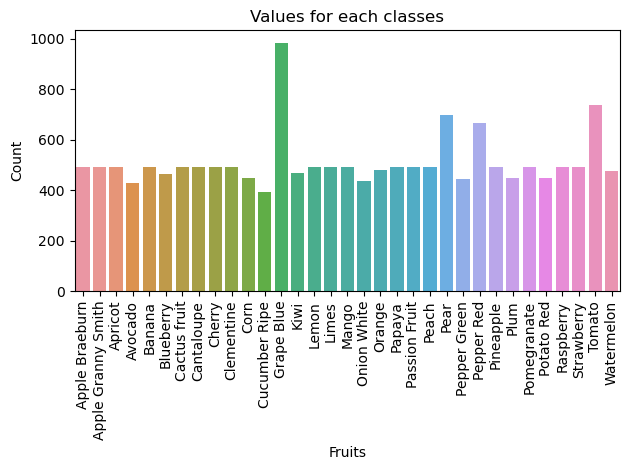

In [12]:
sns.barplot(x = list(classes_values.keys()), y = list(classes_values.values()))
plt.ylabel("Count")
plt.xlabel("Fruits")
plt.title("Values for each classes")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [13]:
classes_list = list(counts.keys())

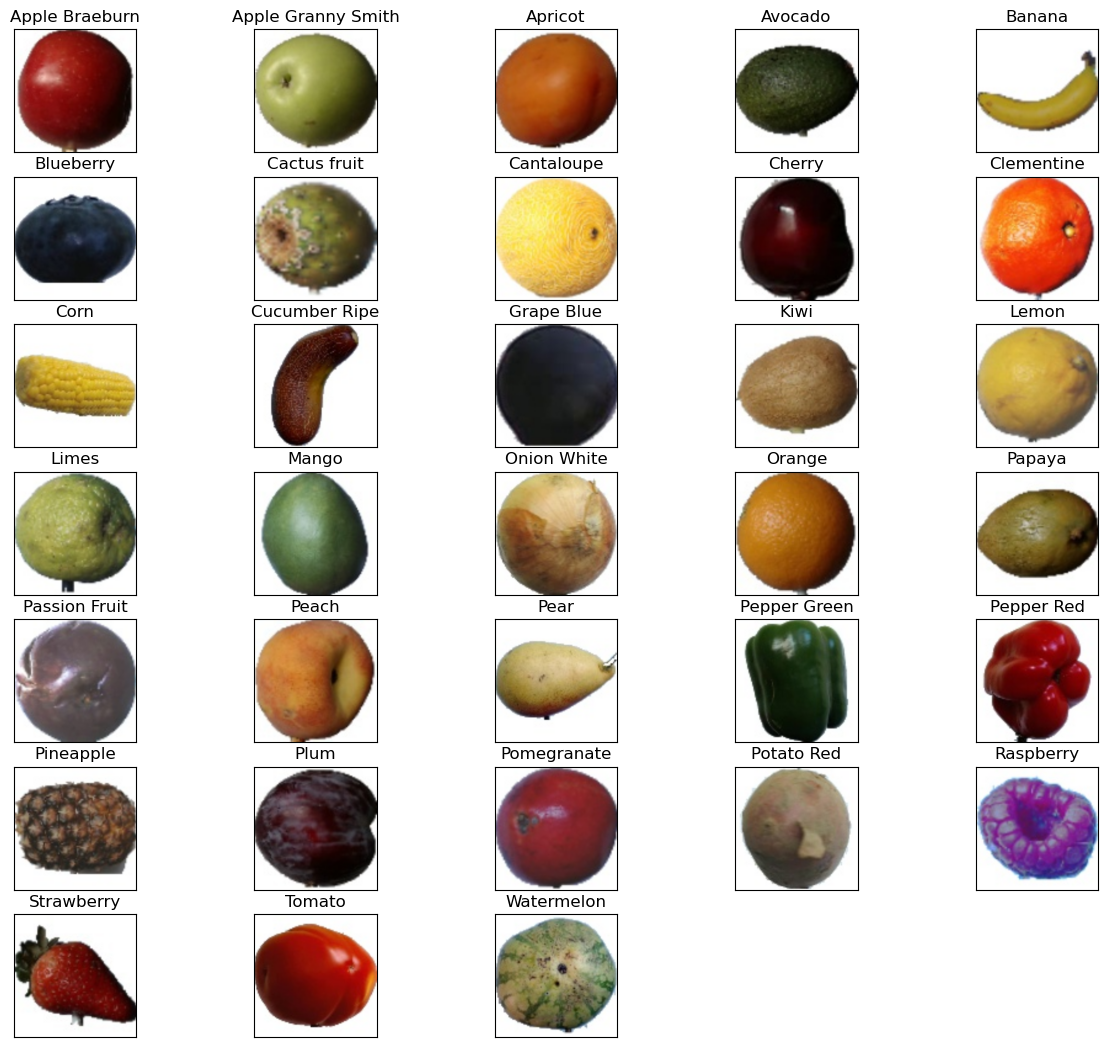

In [14]:
fig = plt.figure(figsize=(15, 15))
rows = 8
columns = 5
count = 1
for img, label in train_data:
    if label in classes_list:
        fig.add_subplot(rows, columns, count)
        plt.title(classes[label])
        plt.imshow(img.permute(1,2,0))
        classes_list.remove(label)
        plt.xticks([])
        plt.yticks([])
        count = count + 1
plt.show()

In [15]:
test_data = ImageFolder('/kaggle/input/fruit-recognition/test', transform = transforms)